# SWE-584 - Exploratory Data Analysis and Visualization - Assigment 1 - k-Means Clustering
- Deniz İrgin
- 2021719069
- 22.03.2022

In this assigment the following has been done;
- Sample clustered data was produced to be used in the k-Means algorithm.
- Implementation of the k-Means algorithm.
- The data set and the movements of the cluster centers are shown graphically.
- The results of the implemented k-Means algorithm and the results of the k-Means algorithm of the sklearn library are compared and shown graphically.

## Table of Contents

1. [Imports](#imports)
2. [k-Means and Plot Settings](#settings)
3. [Functions](#functions)
    - [Sample Dataset Function](#sample-dataset-function)
    - [Initial Centroid Assigment Functions](#initial-assigment-funcs)
        - [Generate Random Points](#generate-random-points)
        - [Pick Random Points](#pick-random-points)
        - [K-Means++](#k-means-plus-plus)
        - [Conclusion](#conclusion)
    - [K-Means Implementation](#k-means-implementation)
4. [Sample Dataset Plotting](#sample-dataset-plotting)
5. [Plot's of Initial and First Three Iteration of Cluster Centers](#initial-three-iteration)
    - [With k=3](#with-k-3)
    - [With k=7](#with-k-7)
6. [Comparison Plot with Sklearn k-Means](#comparison-to-k-means)
7. [Comparison Using Noisy Circles Dataset](#comparison-noisy-circles)
8. [Comparison Using Noisy Moons Dataset](#comparison-noisy-moons)

## <a name="imports"></a> Imports
In this assigment Python standard libraries were used as much as possible in the implementation of k-Means and other auxiliary functions. External library was used only for plot, sklearn k-Means and to generate complex dataset.

In [904]:
import math
import random
import statistics
import copy
import sys

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import cluster, datasets

#
# from sklearn.datasets import make_blobs

## <a name="settings"></a> K-Means and Plot Settings
How many clusters and how many points in each cluster can be adjusted.

In [905]:
number_of_clusters_const = 3
points_per_cluster_const = 1000

sns.set(rc={'figure.figsize': (10, 8)})

## <a name="functions"></a> Functions

### <a name="sample-dataset-function"></a> Sample Dataset Function
Implementation of gaussian random generator for sample dataset. It supports n number of clusters and, n number of points per cluster.

In [906]:
def generate_landscape(number_of_clusters: int, points_per_cluster: int):
    cluster_mean_x = 100
    cluster_mean_y = 100
    cluster_deviation_x = 50
    cluster_deviation_y = 50
    point_deviation_x = 5
    point_deviation_y = 5

    axis_x = []
    axis_y = []

    for i in range(number_of_clusters):
        center_x = random.gauss(cluster_mean_x, cluster_deviation_x)
        center_y = random.gauss(cluster_mean_y, cluster_deviation_y)

        for j in range(points_per_cluster):
            axis_x.append(random.gauss(center_x, point_deviation_x))
            axis_y.append(random.gauss(center_y, point_deviation_y))

    return axis_x, axis_y

### <a name="initial-assigment-funcs"></a> Initial Centroid Assigment Functions

#### <a name="generate-random-points"></a> Generate Random Points
The simplest centroid assignment method. It generates points using Min, max from cluster data. However, if the generated points are too far from the clusters, it can cause the k-Means algorithm to work incorrectly.

In [907]:
def generate_random_points(number_of_clusters: int, x_axis: list[float], y_axis: list[float]):
    random_x_axis: list[float] = []
    random_y_axis: list[float] = []

    for i in range(number_of_clusters):
        random_x = random.uniform(min(x_axis), max(x_axis))
        random_y = random.uniform(min(y_axis), max(y_axis))
        random_x_axis.append(random_x)
        random_y_axis.append(random_y)

    return random_x_axis, random_y_axis

#### <a name="pick-random-points"></a> Pick Random Points
This method performs better than generating random points. It assigns random points from the dataset as centroids. However, in some datasets, two centroids can be very close to each other and cause incorrect results.

In [908]:
def pick_random_points(number_of_clusters: int, x_axis: list[float], y_axis: list[float]):
    random_x_axis: list[float] = []
    random_y_axis: list[float] = []

    for i in range(number_of_clusters):
        temp_index = random.randint(0, len(x_axis) - 1)
        random_x = x_axis[temp_index]
        random_y = y_axis[temp_index]
        random_x_axis.append(random_x)
        random_y_axis.append(random_y)

    return random_x_axis, random_y_axis

#### <a name="k-means-plus-plus"></a> K-Means++
This method is by far the best performing method for centroid assigment. The implementation of k-Means++ below does as follows:

1. The first centroid is selected randomly.
2. Calculate the Euclidean distance between the centroid and every other data point in the dataset. The point farthest away will become our next centroid.
3. Create clusters around these centroids by associating every point with its nearest centroid.
4. The point which has the farthest distance from its centroid will be our next centroid.
5. Repeat steps 3 and 4 until n number of centroids are located.

In [909]:
def get_kmeans_plus_plus_points(number_of_clusters: int, x_axis: list[float], y_axis: list[float]):
    centroids_x: list[float] = []
    centroids_y: list[float] = []

    temp_index = random.randint(0, len(x_axis) - 1)
    centroids_x.append(x_axis[temp_index])
    centroids_y.append(y_axis[temp_index])

    ## compute remaining k - 1 centroids
    for cInx in range(number_of_clusters - 1):

        ## initialize a list to store distances of data
        ## points from nearest centroid
        dist = []
        for i in range(len(x_axis)):
            point_x = x_axis[i]
            point_y = y_axis[i]
            distance = sys.maxsize

            ## compute distance of 'point' from each of the previously selected centroid and store the minimum distance
            for j in range(len(centroids_x)):
                centroid_x = centroids_x[j]
                centroid_y = centroids_y[j]

                temp_dist = math.sqrt((centroid_x - point_x) ** 2 + (centroid_y - point_y) ** 2)
                distance = min(distance, temp_dist)

            dist.append(distance)

        ## select data point with maximum distance as our next centroid
        max_dist_index = [index for (index, item) in enumerate(dist) if item == max(dist)]
        centroids_x.append(x_axis[max_dist_index[0]])
        centroids_y.append(y_axis[max_dist_index[0]])
        dist = []

    return centroids_x, centroids_y

#### <a name="conclusion"></a> Conclusion
As a result of the experiments, it is decided to use the k-means++ algorithm for the initial centroid assignment for the k-means algorithm, as it gave the most accurate result.

### <a name="k-means-implementation"></a> K-Means Implementation

K-means algorithm follows the following steps:
1. Pick n data points that will act as the initial centroids.
2. Calculate the Euclidean distance of each data point from each of the centroid points selected in step 1.
3. Form data clusters by assigning every data point to whichever centroid it has the smallest distance from.
4. Take the average of each formed cluster. The mean points are our new centroids.

This functions returns assigned centroids per iteration as `list[list[float]]`

In [910]:
def kmeans(number_of_clusters: int, x_axis: list[float], y_axis: list[float]):
    diff = 1
    centroid_point_x_mapping: dict[int, list[float]] = {}
    centroid_point_y_mapping: dict[int, list[float]] = {}
    point_centroid_mapping: list[int] = [0] * len(x_axis)
    centroids_x_axis: list[float]
    centroids_y_axis: list[float]
    centroids_x_axis, centroids_y_axis = get_kmeans_plus_plus_points(number_of_clusters, x_axis, y_axis)

    centroids_x_axis_by_iterations: list[list[float]] = []
    centroids_y_axis_by_iterations: list[list[float]] = []
    point_centroid_mapping_by_iterations: list[list[int]] = []

    random_fix_attempt: int = 0
    attempt: int = 0
    while diff:
        # for each observation
        for point_index in range(len(x_axis)):
            max_distance = float('inf')
            point_x = x_axis[point_index]
            point_y = y_axis[point_index]

            # dist of the point from all centroids
            for centroid_index in range(len(centroids_x_axis)):
                centroid_x = centroids_x_axis[centroid_index]
                centroid_y = centroids_y_axis[centroid_index]
                distance = math.sqrt((centroid_x - point_x) ** 2 + (centroid_y - point_y) ** 2)

                # store closest centroid
                if max_distance > distance:
                    max_distance = distance
                    point_centroid_mapping[point_index] = centroid_index

        centroids_x_axis_by_iterations.append(copy.deepcopy(centroids_x_axis))
        centroids_y_axis_by_iterations.append(copy.deepcopy(centroids_y_axis))
        point_centroid_mapping_by_iterations.append(copy.deepcopy(point_centroid_mapping))

        for point_index, centroid_index in enumerate(point_centroid_mapping):
            if centroid_index not in centroid_point_x_mapping:
                centroid_point_x_mapping[centroid_index] = []
            if centroid_index not in centroid_point_y_mapping:
                centroid_point_y_mapping[centroid_index] = []

            centroid_point_x_mapping[centroid_index].append(x_axis[point_index])
            centroid_point_y_mapping[centroid_index].append(y_axis[point_index])

        if len(centroid_point_x_mapping) != len(centroids_x_axis) and random_fix_attempt < 10:
            centroids_x_axis, centroids_y_axis = get_kmeans_plus_plus_points(number_of_clusters, x_axis, y_axis)
            random_fix_attempt += 1
            continue

        fixed_centroid = 0
        for centroid_index in range(len(centroids_x_axis)):
            if centroid_index not in centroid_point_x_mapping:
                centroid_point_x_mapping[centroid_index] = [random.uniform(min(x_axis), max(x_axis))]
            if centroid_index not in centroid_point_y_mapping:
                centroid_point_y_mapping[centroid_index] = [random.uniform(min(y_axis), max(y_axis))]

            centroid_x = centroids_x_axis[centroid_index]
            centroid_y = centroids_y_axis[centroid_index]
            new_centroid_x = statistics.mean(centroid_point_x_mapping[centroid_index])
            new_centroid_y = statistics.mean(centroid_point_y_mapping[centroid_index])

            x_diff = centroid_x - new_centroid_x
            if x_diff < 0:
                x_diff = x_diff * -1

            y_diff = centroid_y - new_centroid_y
            if y_diff < 0:
                y_diff = y_diff * -1

            if x_diff >= 0.1 or y_diff >= 0.1:
                centroids_x_axis[centroid_index] = new_centroid_x
                centroids_y_axis[centroid_index] = new_centroid_y
            else:
                fixed_centroid += 1

        if number_of_clusters == fixed_centroid or attempt == 300:
            diff = 0
        else:
            attempt += 1

    return centroids_x_axis_by_iterations, centroids_y_axis_by_iterations, point_centroid_mapping_by_iterations

## <a name="sample-dataset-plotting"></a> Sample Dataset Plotting

Below is both the printed and plotted version of the generated sample cluster dataset.

In [911]:
axis_x_result, axis_y_result = generate_landscape(number_of_clusters_const, points_per_cluster_const)
# X, y = make_blobs(
#     n_samples=points_per_cluster_const, n_features=2,
#     centers=number_of_clusters_const, cluster_std=0.5,
#     shuffle=True, random_state=23
# )
#
# axis_x_result = X[:, 0].tolist()
# axis_y_result = X[:, 1].tolist()

points = [list(a) for a in zip(axis_x_result, axis_y_result)]

points[:10]

[[65.84545411415971, 82.59202760591245],
 [58.85222527627546, 93.68582401830658],
 [53.466995350117, 88.40698403133074],
 [59.21185067313371, 86.31578435243522],
 [55.9069109964571, 102.22546016890897],
 [63.37739421894923, 101.29800653783938],
 [55.158366299436906, 94.61279032702669],
 [51.7415349602312, 96.90125438091248],
 [50.48116895842043, 88.16138093457837],
 [60.87127652776746, 94.51970691669219]]

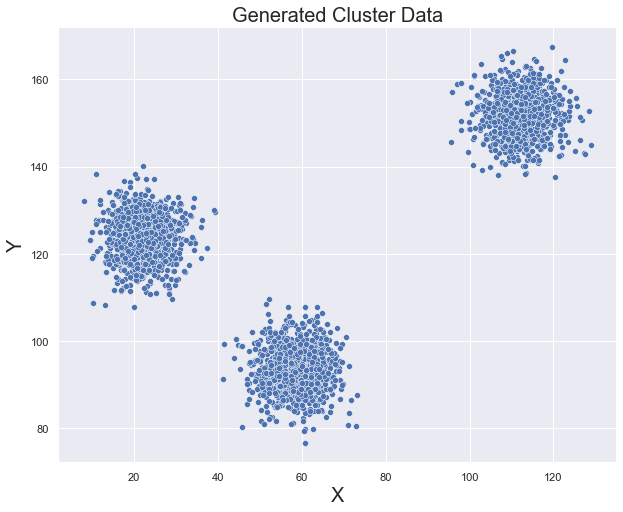

In [912]:
sns.scatterplot(x=axis_x_result, y=axis_y_result)

plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)

plt.title("Generated Cluster Data", fontsize=20)
plt.show()

## <a name="initial-three-iteration"></a> Plot's of Initial and First Three Iteration of Cluster Centers
In the code block below, it is observed that the kmeans algorithm is run and the cluster centers are returned in a `list[list[float]]` for each iteration.

Since k-means++ was used to determine initial cluster centroids it is observed that the k-means algorithm often found the right cluster centers in two, rarely three iterations.

### <a name="with-k-3"></a> With k=3

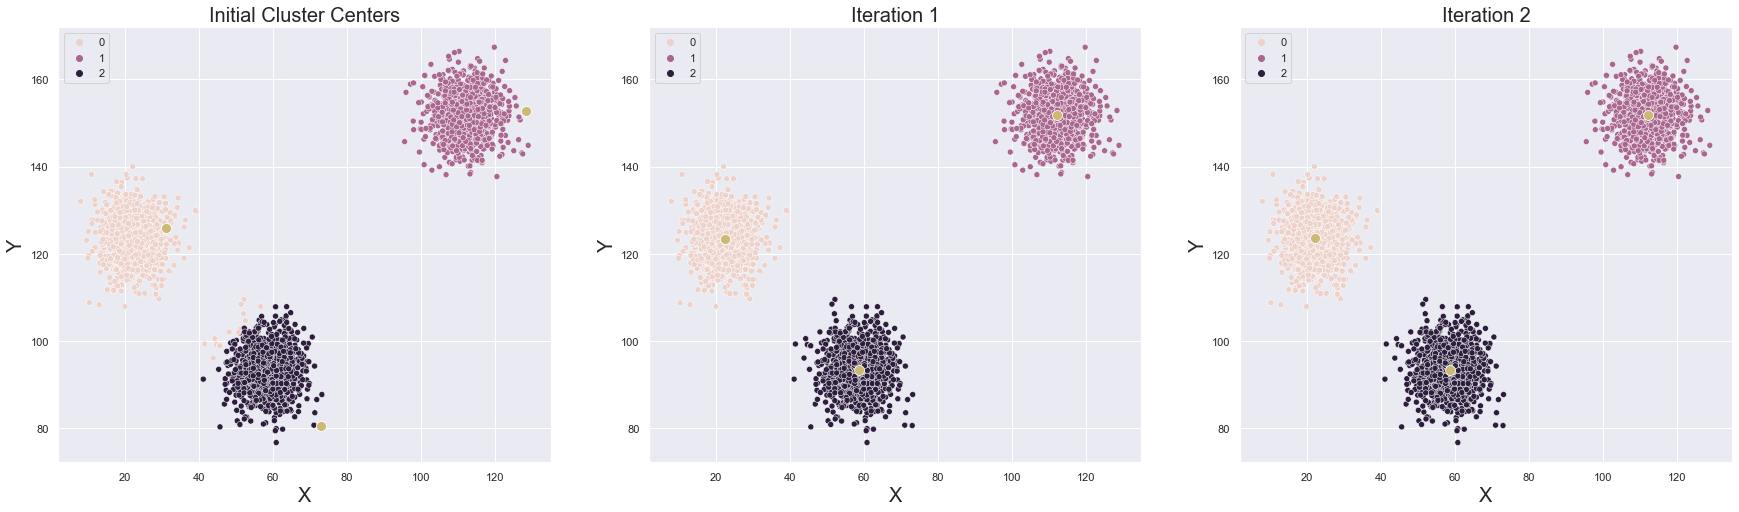

In [913]:
# Get results of my k-means
centroids_x_axis_results, centroids_y_axis_results, point_centroid_mapping_results = kmeans(number_of_clusters_const,
                                                                                            axis_x_result,
                                                                                            axis_y_result)

centroids_x_axis_top_3 = centroids_x_axis_results[:3]
centroids_y_axis_top_3 = centroids_y_axis_results[:3]
point_centroid_mapping_top3 = point_centroid_mapping_results[:3]

centroids_len = len(centroids_x_axis_top_3)
fig, ax = plt.subplots(nrows=1, ncols=centroids_len, figsize=(10 * centroids_len, 8))

for i in range(centroids_len):
    centroid_x_axis_n = centroids_x_axis_top_3[i]
    centroid_y_axis_n = centroids_y_axis_top_3[i]
    point_centroid_mapping_n = point_centroid_mapping_top3[i]

    title = ""
    if i == 0:
        title = "Initial Cluster Centers"
    else:
        title = "Iteration {i}".format(i=i)

    ax[i].set_title(title, fontsize=20)
    ax[i].set_xlabel("X", fontsize=20)
    ax[i].set_ylabel("Y", fontsize=20)
    sns.scatterplot(x=axis_x_result, y=axis_y_result, hue=point_centroid_mapping_n, ax=ax[i])
    sns.scatterplot(x=centroid_x_axis_n, y=centroid_y_axis_n, s=100, color='y', ax=ax[i])

plt.show()

### <a name="with-k-7"></a> With k=7

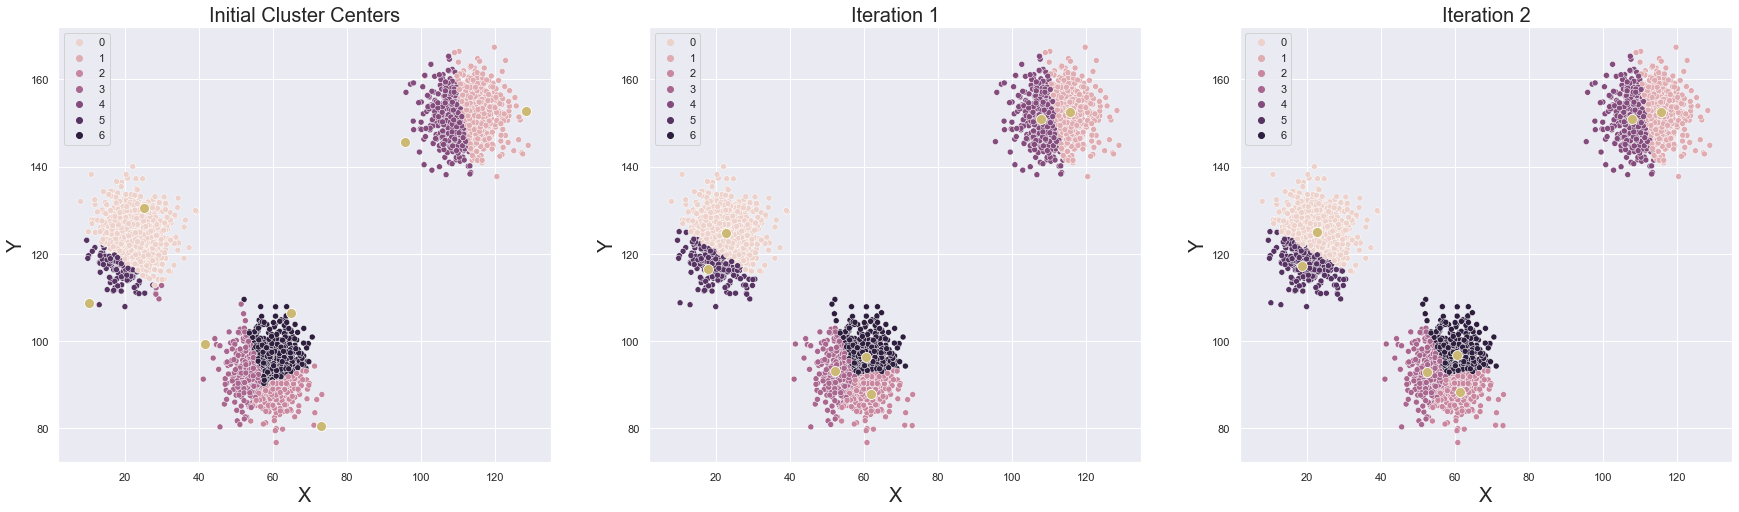

In [914]:
# Get results of my k-means
centroids_x_axis_results, centroids_y_axis_results, point_centroid_mapping_results = kmeans(7, axis_x_result,
                                                                                            axis_y_result)

centroids_x_axis_top_3 = centroids_x_axis_results[:3]
centroids_y_axis_top_3 = centroids_y_axis_results[:3]
point_centroid_mapping_top3 = point_centroid_mapping_results[:3]

centroids_len = len(centroids_x_axis_top_3)
fig, ax = plt.subplots(nrows=1, ncols=centroids_len, figsize=(10 * centroids_len, 8))

for i in range(centroids_len):
    centroid_x_axis_n = centroids_x_axis_top_3[i]
    centroid_y_axis_n = centroids_y_axis_top_3[i]
    point_centroid_mapping_n = point_centroid_mapping_top3[i]

    title = ""
    if i == 0:
        title = "Initial Cluster Centers"
    else:
        title = "Iteration {i}".format(i=i)

    ax[i].set_title(title, fontsize=20)
    ax[i].set_xlabel("X", fontsize=20)
    ax[i].set_ylabel("Y", fontsize=20)
    sns.scatterplot(x=axis_x_result, y=axis_y_result, hue=point_centroid_mapping_n, ax=ax[i])
    sns.scatterplot(x=centroid_x_axis_n, y=centroid_y_axis_n, s=100, color='y', ax=ax[i])

plt.show()

## <a name="comparison-to-k-means"></a> Comparison Plot with Sklearn k-Means
In the code block below, the output of the sklearn k-means algorithm is compared to the implemented k-means algorithm.

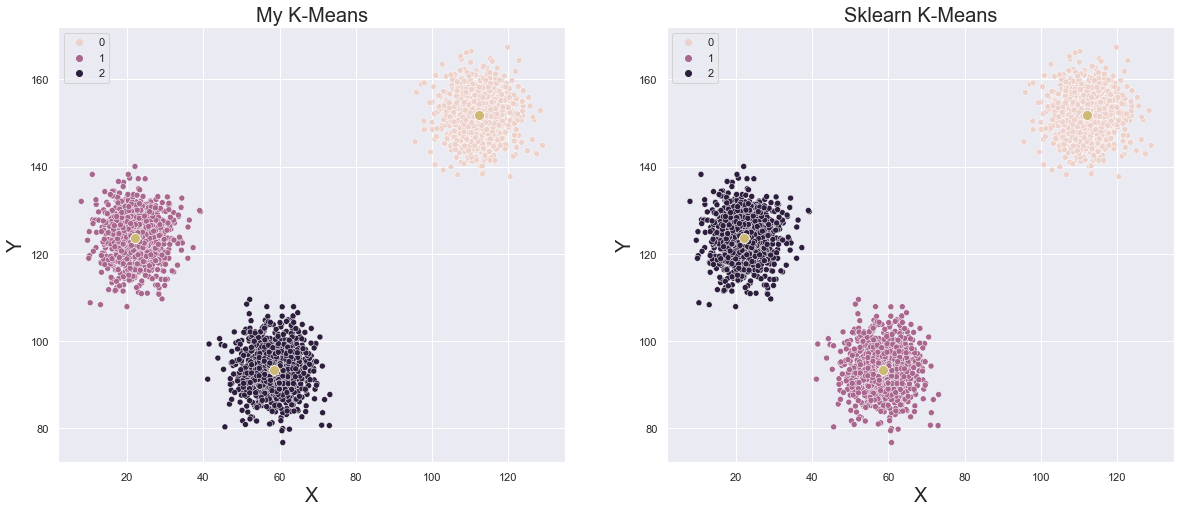

In [915]:
centroids_x_axis_results, centroids_y_axis_results, point_centroid_mapping_results = kmeans(number_of_clusters_const, axis_x_result,
                                                                                            axis_y_result)

centroids_x_axis_result = centroids_x_axis_results[len(centroids_x_axis_results) - 1]
centroids_y_axis_result = centroids_y_axis_results[len(centroids_y_axis_results) - 1]
point_centroid_mapping_result = point_centroid_mapping_results[len(point_centroid_mapping_results) - 1]

# Get result of sklearn k-means
km = KMeans(
    n_clusters=number_of_clusters_const, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(points)

# Prepare plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

ax1.set_title("My K-Means", fontsize=20)
ax1.set_xlabel("X", fontsize=20)
ax1.set_ylabel("Y", fontsize=20)
sns.scatterplot(x=axis_x_result, y=axis_y_result, hue=point_centroid_mapping_result, ax=ax1)
sns.scatterplot(x=centroids_x_axis_result, y=centroids_y_axis_result, s=100, color='y', ax=ax1)

ax2.set_title("Sklearn K-Means", fontsize=20)
ax2.set_xlabel("X", fontsize=20)
ax2.set_ylabel("Y", fontsize=20)
sns.scatterplot(x=axis_x_result, y=axis_y_result, hue=y_km, ax=ax2)
sns.scatterplot(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1], s=100, color='y', ax=ax2)

plt.show()

## <a name="comparison-noisy-circles"></a> Comparison Using Noisy Circles Dataset

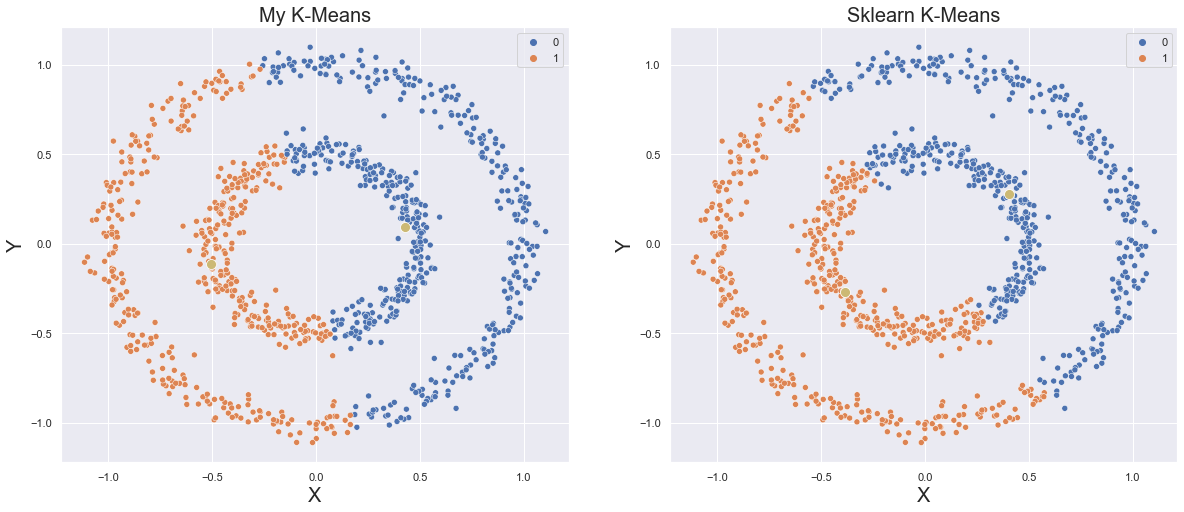

In [916]:
number_of_clusters_const = 2

noisy_circles, y = datasets.make_circles(n_samples=points_per_cluster_const, factor=0.5, noise=0.05)
noisy_circles_axis_x_result = noisy_circles[:, 0].tolist()
noisy_circles_axis_y_result = noisy_circles[:, 1].tolist()

centroids_x_axis_results, centroids_y_axis_results, point_centroid_mapping_results = kmeans(number_of_clusters_const, noisy_circles_axis_x_result,
                                                                                            noisy_circles_axis_y_result)

centroids_x_axis_result = centroids_x_axis_results[len(centroids_x_axis_results) - 1]
centroids_y_axis_result = centroids_y_axis_results[len(centroids_y_axis_results) - 1]
point_centroid_mapping_result = point_centroid_mapping_results[len(point_centroid_mapping_results) - 1]

# Get result of sklearn k-means
km = KMeans(
    n_clusters=number_of_clusters_const, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(noisy_circles)

# Prepare plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

ax1.set_title("My K-Means", fontsize=20)
ax1.set_xlabel("X", fontsize=20)
ax1.set_ylabel("Y", fontsize=20)
sns.scatterplot(x=noisy_circles_axis_x_result, y=noisy_circles_axis_y_result, hue=point_centroid_mapping_result, ax=ax1)
sns.scatterplot(x=centroids_x_axis_result, y=centroids_y_axis_result, s=100, color='y', ax=ax1)

ax2.set_title("Sklearn K-Means", fontsize=20)
ax2.set_xlabel("X", fontsize=20)
ax2.set_ylabel("Y", fontsize=20)
sns.scatterplot(x=noisy_circles_axis_x_result, y=noisy_circles_axis_y_result, hue=y_km, ax=ax2)
sns.scatterplot(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1], s=100, color='y', ax=ax2)

plt.show()

## <a name="comparison-noisy-moons"></a> Comparison Using Noisy Moons Dataset

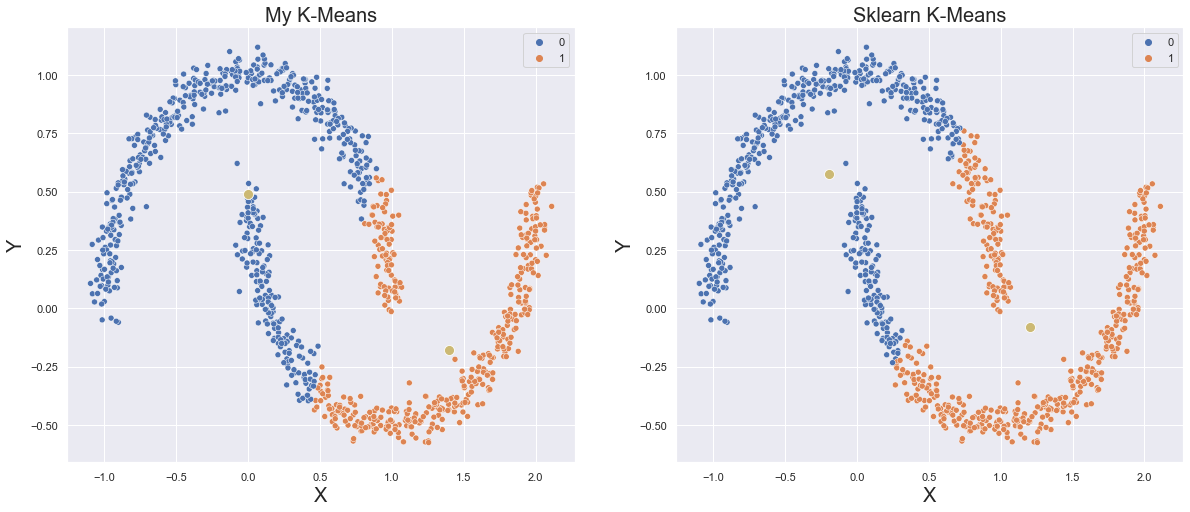

In [917]:
number_of_clusters_const = 2

noisy_moons, y = datasets.make_moons(n_samples=points_per_cluster_const, noise=0.05)
noisy_moons_axis_x_result = noisy_moons[:, 0].tolist()
noisy_moons_axis_y_result = noisy_moons[:, 1].tolist()

centroids_x_axis_results, centroids_y_axis_results, point_centroid_mapping_results = kmeans(number_of_clusters_const, noisy_moons_axis_x_result,
                                                                                            noisy_moons_axis_y_result)

centroids_x_axis_result = centroids_x_axis_results[len(centroids_x_axis_results) - 1]
centroids_y_axis_result = centroids_y_axis_results[len(centroids_y_axis_results) - 1]
point_centroid_mapping_result = point_centroid_mapping_results[len(point_centroid_mapping_results) - 1]

# Get result of sklearn k-means
km = KMeans(
    n_clusters=number_of_clusters_const, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(noisy_moons)

# Prepare plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

ax1.set_title("My K-Means", fontsize=20)
ax1.set_xlabel("X", fontsize=20)
ax1.set_ylabel("Y", fontsize=20)
sns.scatterplot(x=noisy_moons_axis_x_result, y=noisy_moons_axis_y_result, hue=point_centroid_mapping_result, ax=ax1)
sns.scatterplot(x=centroids_x_axis_result, y=centroids_y_axis_result, s=100, color='y', ax=ax1)

ax2.set_title("Sklearn K-Means", fontsize=20)
ax2.set_xlabel("X", fontsize=20)
ax2.set_ylabel("Y", fontsize=20)
sns.scatterplot(x=noisy_moons_axis_x_result, y=noisy_moons_axis_y_result, hue=y_km, ax=ax2)
sns.scatterplot(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1], s=100, color='y', ax=ax2)

plt.show()